# 0. Project Background: 

The company, Home Credit strives to solve a problem where people struggle to get loans due to insufficient or non-existent credit histories. They are attempting to broaden the scope of financial loan provisions by providing an inclusive, positive and safe borrowing experience. To make decisions to find the best possible loans option for this alternate population, Home Credit uses of a variety of data to predict their clients' repayment abilities. This ensures that clients capable of repaying are sactioned a loan and with a principal, maturity, and repayment calendar that will empower their clients to be successful.

**Objective**:

1. Understanding the data and different features available. (EDA)
2. Identification of important characteristics of clients that determine ability or inablity to repay loans. (feature selection)
3. Predicting a client’s capability to repay a loan. (Prediction Modelling)

**Actions**:
1. Explore the data and prepare it for modelling (cleaning, preporocesing, EDA, visualizations)
2. Identify relationships in the data (features-target and feature-feaures themselves) for feature selection and finding important features.
3. Building models with different machine learning algorithms and evaluating them
4. Select the best model and use to predict and repayment ability on test data.


# 1. Setup
In this step we will doing our imports setting configuration and loading the dataset files na dexploring them a bit before moving on to a more detailed analysis in next step

In [1]:
# importing the libraries required for analysis and modelling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import cross_val_score

In [2]:
# Ignoring warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 03/05/2024 01:20:40


In [4]:
# setting color palette, style and context for all seaborn visualizations
color_palette = "Set2"
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2)

In [5]:
# Loading the dataset into pandas dataframe
app_train_df = pd.read_csv("application_train.csv")
print(f"Shape of the dataset (number of rows and columns): {app_train_df.shape}")


Shape of the dataset (number of rows and columns): (199882, 122)


In [6]:
# printing out first few rows of the dataset
app_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,aou6ud,0,Cash loans,M,N,Y,0,360000.0,1125000.0,33025.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,xxbaad,0,Cash loans,F,N,Y,0,112500.0,251280.0,13630.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
2,xdrbad,0,Cash loans,F,N,Y,0,225000.0,544491.0,15916.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
3,rbdd7d,0,Cash loans,F,N,N,2,211500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


The dependent variable is the second column on the dataframe (TARGET) which defines if the client defaulted on a loan repayment. This is defined as a payment later than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0. Hence, this is a classification problem with two classes (Binary Classification)

# 2. EDA (Exploratory Data Analysis)

In [7]:
# We will now get a count of different datatypes in our dataset
data_type_counts = app_train_df.dtypes.value_counts()
print(data_type_counts)

float64    65
int64      40
object     17
Name: count, dtype: int64


In [8]:
# We will now explore the distribution of our target variable
# Before that, we encode our target to be more understandable. We will do this on a copy of our original dataframe.

df = app_train_df.copy()

mapping = {0: "Non-Default", 1: "Default"}
def decode_target(y):
    return mapping[int(y)]

df['TARGET'] = df['TARGET'].apply(lambda x: decode_target(x))
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,aou6ud,Non-Default,Cash loans,M,N,Y,0,360000.0,1125000.0,33025.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,xxbaad,Non-Default,Cash loans,F,N,Y,0,112500.0,251280.0,13630.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
2,xdrbad,Non-Default,Cash loans,F,N,Y,0,225000.0,544491.0,15916.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
3,rbdd7d,Non-Default,Cash loans,F,N,N,2,211500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,rexddr,Default,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


### 2.1. Distribution of target variable

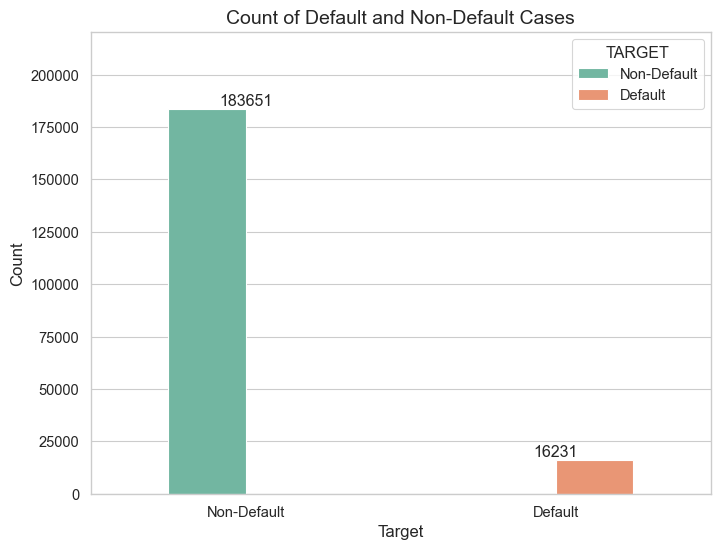

In [9]:
# We will explore the distribution of target variable in the dataset.

class_counts = df['TARGET'].value_counts()  # finding counts of both classes

# Creating a bar plot with the calculated counts
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, width=0.5, palette=color_palette)

# Setting the plot labels and title
plt.xlabel('Target',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Count of Default and Non-Default Cases',fontsize=14)

ax.set_ylim(0, class_counts.max() * 1.2) # adding extra padding on y axis

# Adding annotations for count of each class
for index, value in enumerate(class_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# displaying the plot
plt.show()

There is a much higher number of Non-Default cases (Class 0) compared to default cases (Class 1): 183,651 vs 16,231.

Thus, we see a large class imbalance. We will need to address this before training our model using oversampling the minority class using methods like SMOTE.

### 2.2. Distribution of target variable by categorical features

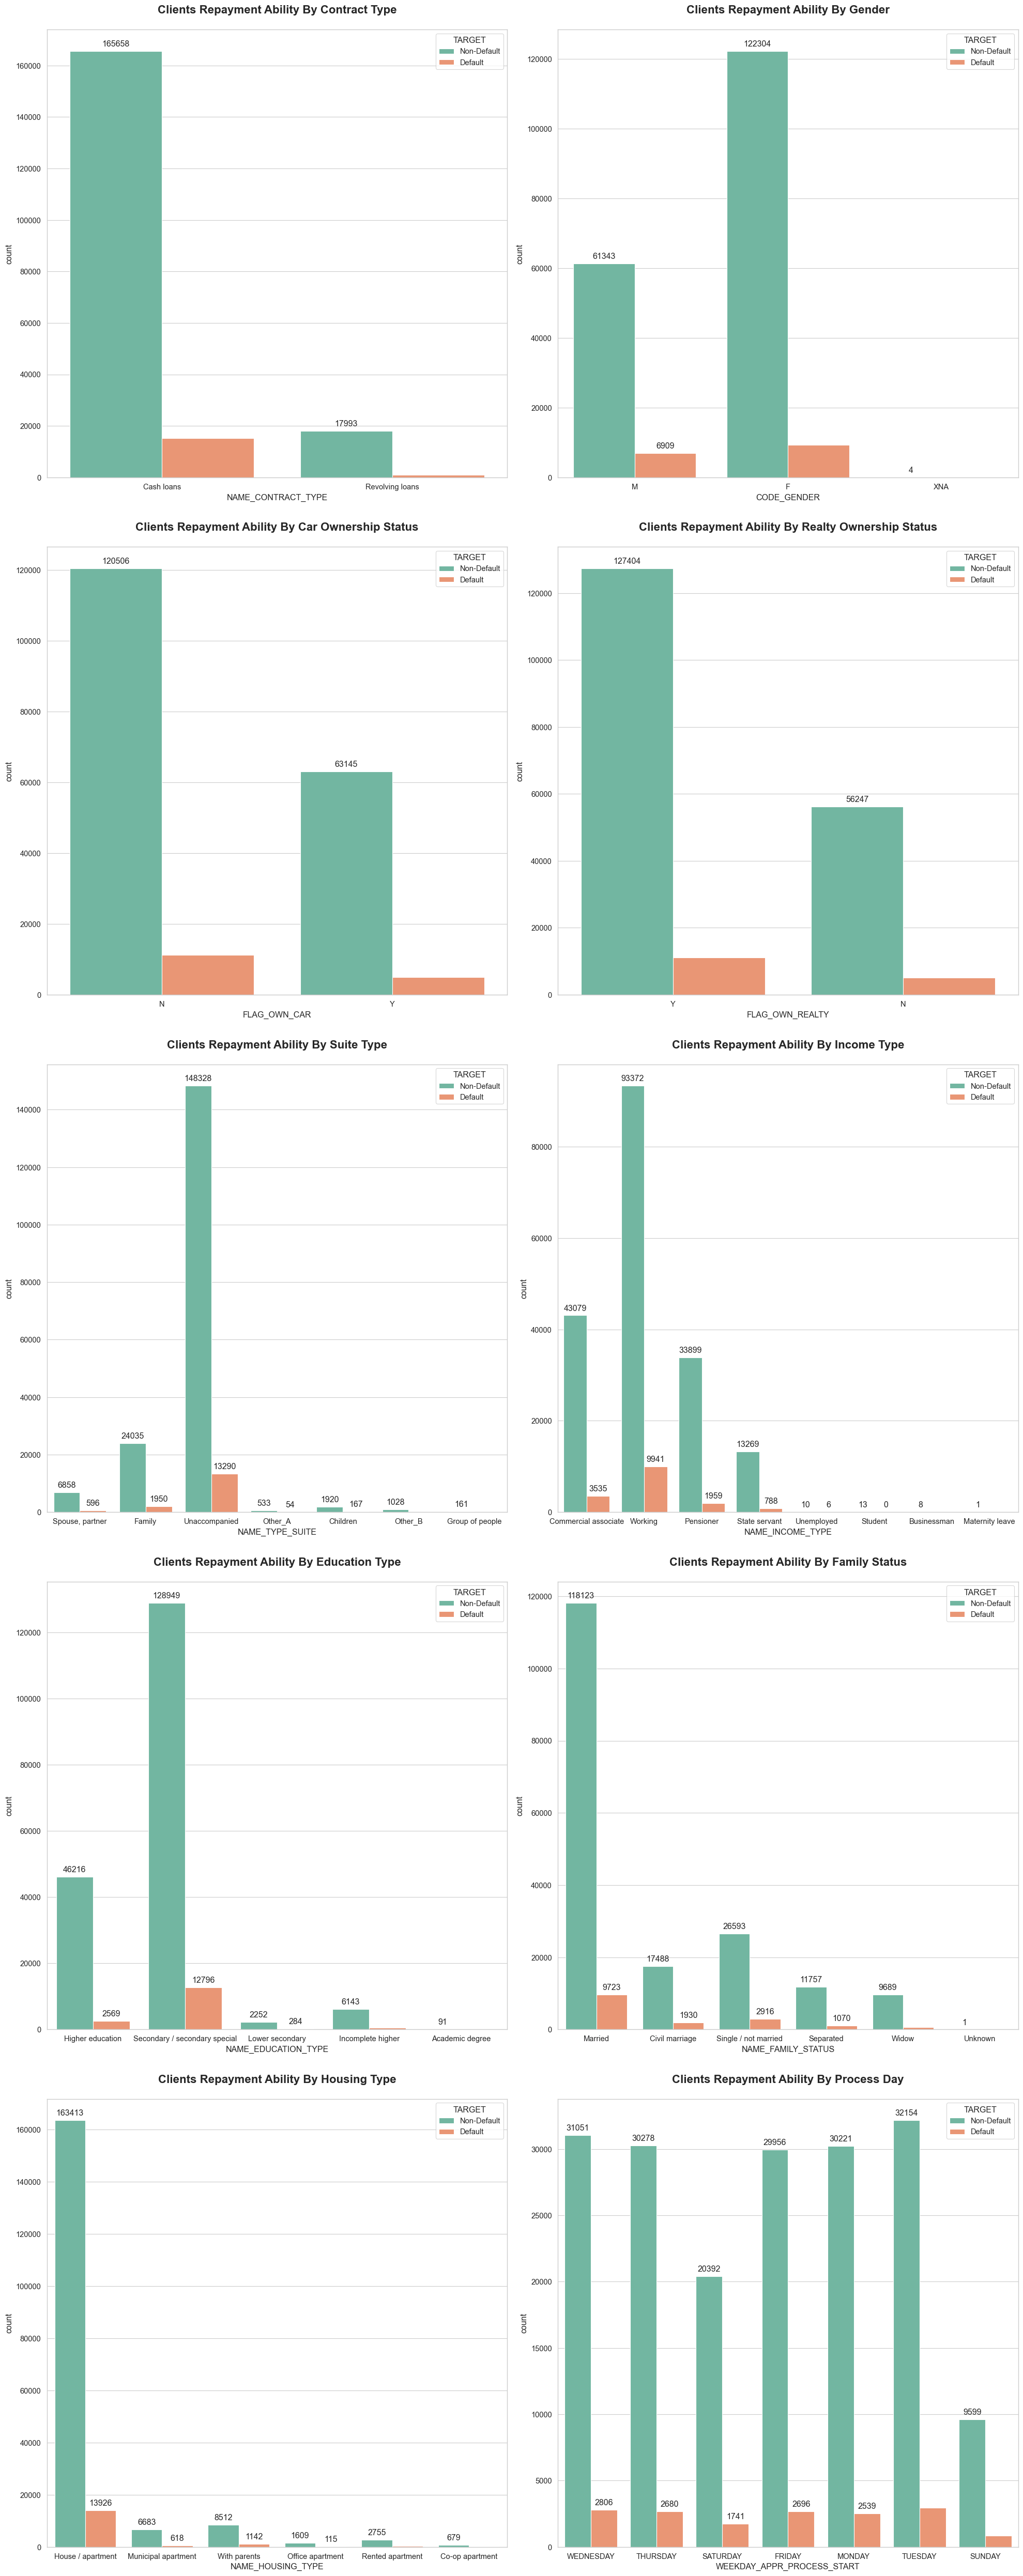

In [10]:
# Next we will explore distribution of target variable for different categorical features.

fig, ax = plt.subplots(5, 2, figsize=(20, 50))

# Dictionary mapping titles to corresponding column names
plot_info = {
    'Clients Repayment Ability By Contract Type\n': 'NAME_CONTRACT_TYPE',
    'Clients Repayment Ability By Gender\n': 'CODE_GENDER',
    '\nClients Repayment Ability By Car Ownership Status\n': 'FLAG_OWN_CAR',
    '\nClients Repayment Ability By Realty Ownership Status\n': 'FLAG_OWN_REALTY',
    'Clients Repayment Ability By Suite Type\n': 'NAME_TYPE_SUITE',
    'Clients Repayment Ability By Income Type\n': 'NAME_INCOME_TYPE',
    '\nClients Repayment Ability By Education Type\n': 'NAME_EDUCATION_TYPE',
    '\nClients Repayment Ability By Family Status\n': 'NAME_FAMILY_STATUS',
    'Clients Repayment Ability By Housing Type\n': 'NAME_HOUSING_TYPE',
    'Clients Repayment Ability By Process Day\n': 'WEEKDAY_APPR_PROCESS_START'
}

# Loop through each subplot
for i, (title, column) in enumerate(plot_info.items()):
    axis = ax[i // 2][i % 2]
    axis.set_title(title, fontweight='bold', fontsize=16)
    sns.countplot(x=column, data=df, hue='TARGET', palette=color_palette, ax=axis)

    # Calculate counts for annotations
    counts = df.groupby([column, 'TARGET']).size().unstack(fill_value=0)
    counts['Total'] = counts['Default'] + counts['Non-Default']
    counts['Default_Percentage'] = (counts['Default'] / counts['Total']) * 100
    counts['Non-Default_Percentage'] = (counts['Non-Default'] / counts['Total']) * 100
    counts['Default_Percentage'] = round(counts['Default_Percentage'],0).astype(int)
    counts['Non-Default_Percentage'] = round(counts['Non-Default_Percentage'],0).astype(int)

    for bar in axis.patches[:-2]:  # Iterate up to the second-to-last patch
        x = bar.get_x() + bar.get_width() / 2  # Center of the bar
        height = int(bar.get_height())
        axis.annotate(f'{height}', (x, height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        
# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Client repayment ability by contract type
contract_target_percentage = df.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
contract_target_percentage


TARGET,Default,Non-Default
NAME_CONTRACT_TYPE,,
Cash loans,8.40,91.60
Revolving loans,5.44,94.56


In [12]:
# Client repayment ability by gender
gender_target_percentage = df.groupby(['CODE_GENDER', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
gender_target_percentage


TARGET,Default,Non-Default
CODE_GENDER,,
F,7.08,92.92
M,10.12,89.88
XNA,NaN,100.00


In [13]:
# Client repayment ability by car ownership
car_target_percentage = df.groupby(['FLAG_OWN_CAR', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
car_target_percentage


TARGET,Default,Non-Default
FLAG_OWN_CAR,,
N,8.58,91.42
Y,7.24,92.76


In [14]:
# Client repayment ability by realty ownership
realty_target_percentage = df.groupby(['FLAG_OWN_REALTY', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
realty_target_percentage


TARGET,Default,Non-Default
FLAG_OWN_REALTY,,
N,8.36,91.64
Y,8.01,91.99


In [15]:
# Client repayment ability by Suite Type
suite_target_percentage = df.groupby(['NAME_TYPE_SUITE', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
suite_target_percentage


TARGET,Default,Non-Default
NAME_TYPE_SUITE,,
Children,8.00,92.00
Family,7.50,92.50
Group of people,5.29,94.71
Other_A,9.20,90.80
Other_B,9.67,90.33
"Spouse, partner",8.00,92.00
Unaccompanied,8.22,91.78


In [16]:
# Client repayment ability by Income Type
income_target_percentage = df.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
income_target_percentage


TARGET,Default,Non-Default
NAME_INCOME_TYPE,,
Businessman,NaN,100.00
Commercial associate,7.58,92.42
Maternity leave,66.67,33.33
Pensioner,5.46,94.54
State servant,5.61,94.39
Student,NaN,100.00
Unemployed,37.50,62.50
Working,9.62,90.38


In [17]:
# Client repayment ability by Education Type 
education_target_percentage = df.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
education_target_percentage


TARGET,Default,Non-Default
NAME_EDUCATION_TYPE,,
Academic degree,2.15,97.85
Higher education,5.27,94.73
Incomplete higher,8.63,91.37
Lower secondary,11.20,88.80
Secondary / secondary special,9.03,90.97


In [18]:
# Client repayment ability by family status
family_target_percentage = df.groupby(['NAME_FAMILY_STATUS', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
family_target_percentage


TARGET,Default,Non-Default
NAME_FAMILY_STATUS,,
Civil marriage,9.94,90.06
Married,7.61,92.39
Separated,8.34,91.66
Single / not married,9.88,90.12
Unknown,NaN,100.00
Widow,5.76,94.24


In [19]:
# Client repayment ability by housing Type
housing_target_percentage = df.groupby(['NAME_HOUSING_TYPE', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
housing_target_percentage


TARGET,Default,Non-Default
NAME_HOUSING_TYPE,,
Co-op apartment,7.99,92.01
House / apartment,7.85,92.15
Municipal apartment,8.46,91.54
Office apartment,6.67,93.33
Rented apartment,11.87,88.13
With parents,11.83,88.17


In [20]:
# Client repayment ability by procesing day
process_target_percentage = df.groupby(['WEEKDAY_APPR_PROCESS_START', 'TARGET']).size().unstack().apply(lambda x: round((x / x.sum()) * 100,2), axis=1)
process_target_percentage


TARGET,Default,Non-Default
WEEKDAY_APPR_PROCESS_START,,
FRIDAY,8.26,91.74
MONDAY,7.75,92.25
SATURDAY,7.87,92.13
SUNDAY,8.03,91.97
THURSDAY,8.13,91.87
TUESDAY,8.35,91.65
WEDNESDAY,8.29,91.71


#### Observations:
From above visualizations and analysis, we can see following patterns in the dataset:
1. There is a much larger number of clients taking out cash loans compared to revolving loans. Cash loans have higher defaults (8.4%) compared to revolving loans(5.4%)
2. Women have taken out much larger number of loans compared to men. There is a small number of unknowns in gender (XNA). The default rate for men is higher than women even with lesses number of total applications (10% vs 7%)
3. There is a higher number of non car owners applying for loan compared to car owners. The default rate is very similar for both car onwers and non car owners.
4. Larger number of realty owners have applied for loans. default rate is very similar for both owners and non-owners
5. A large majority of applicants are have Unaccmopanied suite type. The defualt rate for group of people is much lower that other suite types at 5.29%
6. Most common applicants have income type workng followed by commercial associates, pensioners and state servants. We see very high default percentage for income types 'Maternity Leave' and 'Unemployed', but those are due to very low number of datapoints. Suprisingly, the most common income type (Working) has a higher than average default rate of 9.62%.
7. Secodary Education is the most common education tyoe among applicants followed by higher education. Once again, the most common type (secondary education) has the highest default rate at 11.2%
8. Majority of applicants reported their family status as married. Widows have a lower than average default rate compared to others.
9. Similarly, majority live in a house/apartment. People living with parent or in rented apartments have the higest default rate at nearly 12%
10. We see high number for applications for weekdays with smaller numbers for Saturday followed by Sunday. The defaults rates do not change much with the dat of the week.


### 2.3. Distribution of target variable by numerical features

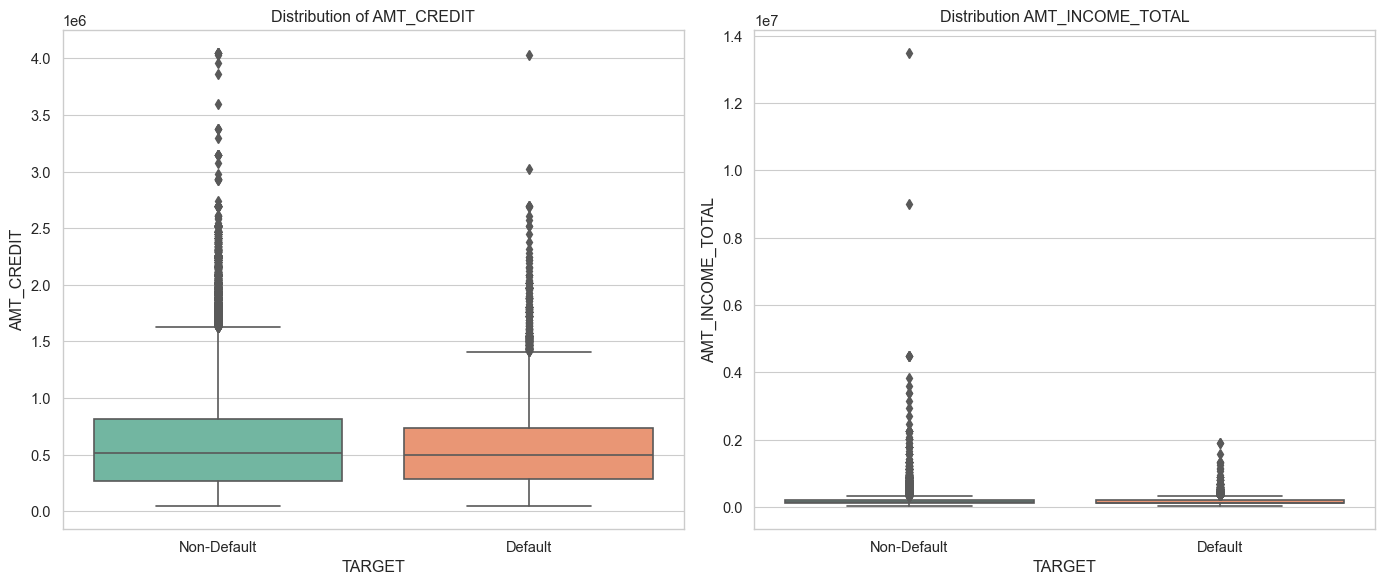

In [21]:
# Now we eill explore distribution of taget variable by differnt numerical features

# Creating side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Boxplot for 'AMT_CREDIT' by 'TARGET'
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df, palette=color_palette, ax=axes[0])
axes[0].set_title('Distribution of AMT_CREDIT')

# Boxplot for 'AMT_INCOME_TOTAL' by 'TARGET'
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df, palette=color_palette, ax=axes[1])
axes[1].set_title('Distribution AMT_INCOME_TOTAL')

plt.tight_layout()
plt.show()

The median credit amount of the cases that did not default is slightly higher than the median value of cases that defaulted. We can conclude that people who were approved for a ligher loan amout the chances of repayment are also hgiher. Conversly, we see more defaults for lower credit amounts

It can be seen that both clients who have payment difficulties as well as clients who have no payment difficulties, have mostly the same value.
However, as the client's income increases, the probability that cliets will not have difficulty repaying the loan also increases.

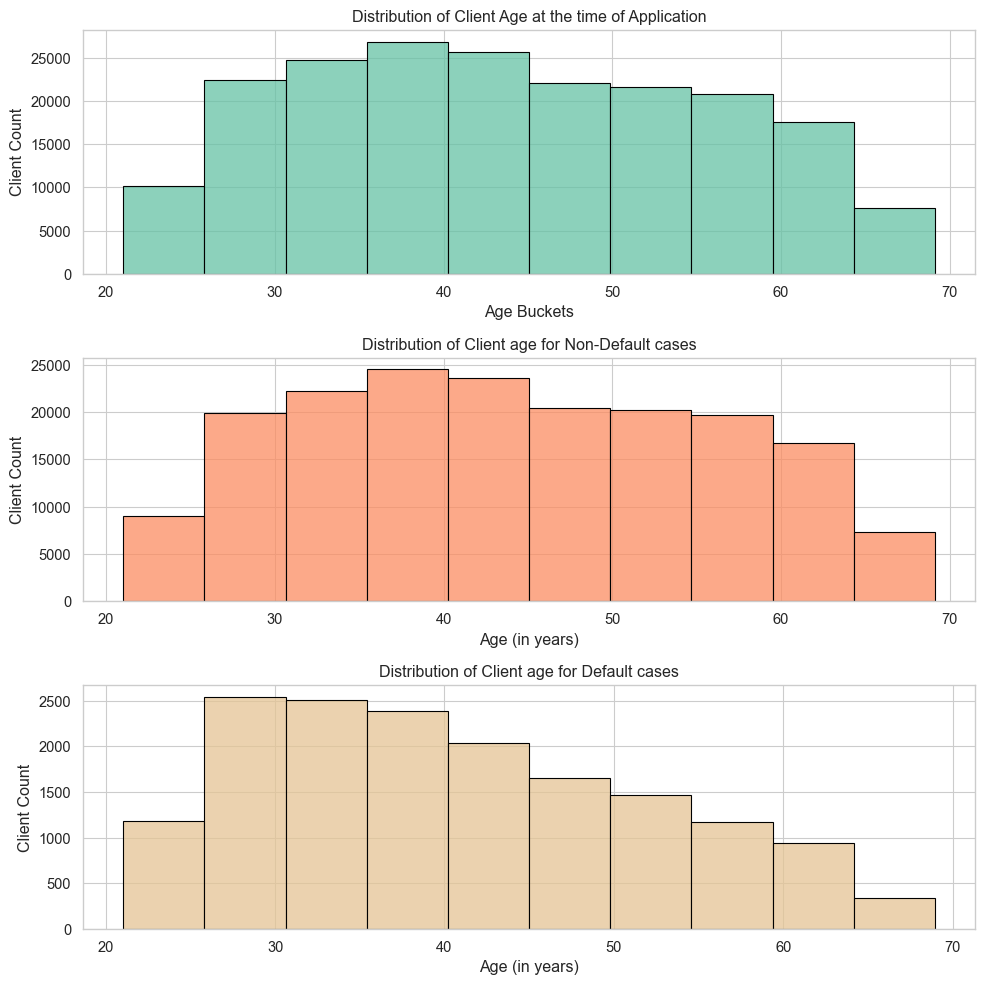

In [22]:
# Dustribution of age by target
non_default_age = df[df['TARGET']=='Non-Default']['DAYS_BIRTH'].values/-365
default_age = df[df['TARGET']=='Default']['DAYS_BIRTH'].values/-365

# Creating side-by-side subplots
fig, axes = plt.subplots(3,1, figsize=(10, 10))

# Histogram for 'DAYS_BIRTH'
sns.histplot(df['DAYS_BIRTH'].values / -365, bins=10, edgecolor='black', color=sns.color_palette(color_palette)[0], ax=axes[0])
axes[0].set_title('Distribution of Client Age at the time of Application')
axes[0].set_xlabel('Age Buckets')
axes[0].set_ylabel('Client Count')

# Histogram for 'non-defaulters'
sns.histplot(non_default_age, bins=10, edgecolor='black', color=sns.color_palette(color_palette)[1], ax=axes[1])
axes[1].set_title('Distribution of Client age for Non-Default cases')
axes[1].set_xlabel('Age (in years)')
axes[1].set_ylabel('Client Count')

# Histogram for 'defaulters'
sns.histplot(default_age, bins=10, edgecolor='black', color=sns.color_palette(color_palette)[6], ax=axes[2])
axes[2].set_title('Distribution of Client age for Default cases')
axes[2].set_xlabel('Age (in years)')
axes[2].set_ylabel('Client Count')

plt.tight_layout()
plt.show()

The number of clients who apply for loans is highest for age range of 35-40 years, followed by clients in the range of 40-45 years. The number of applicants for clients at extremes (age <25 or age >65) is much lower.

The distribution of ages for non default cases is very similar to overall age distribution with maximum clients age range of 35-40 years.

The distribution for defaulting cases, however, is right skewed with highest number in range of 25-35 years.

## 2.4  Multivariable Analysis

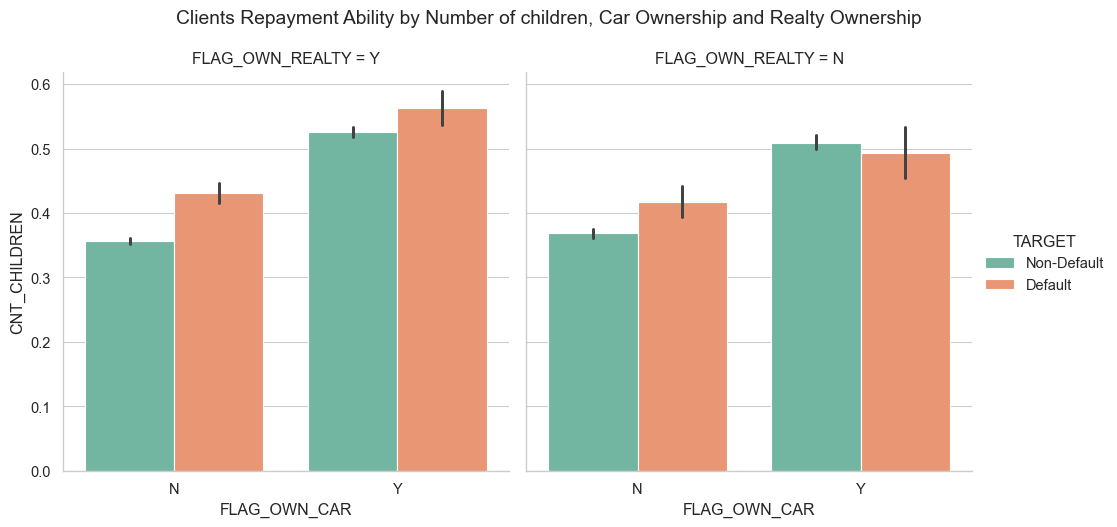

In [23]:
# distribution of count of children grouped by target, realty ownership and car ownership
cat_plot = sns.catplot(data = df, x = 'FLAG_OWN_CAR', y = 'CNT_CHILDREN',  
            hue = 'TARGET', col = 'FLAG_OWN_REALTY',  
            kind = 'bar', palette = color_palette )
plt.suptitle("Clients Repayment Ability by Number of children, Car Ownership and Realty Ownership",y=1.05)
plt.show()

Compared to clients who do not own houses or apartments, clients who own a car and a house/flat find it difficult to repay the loans for a large number of children.

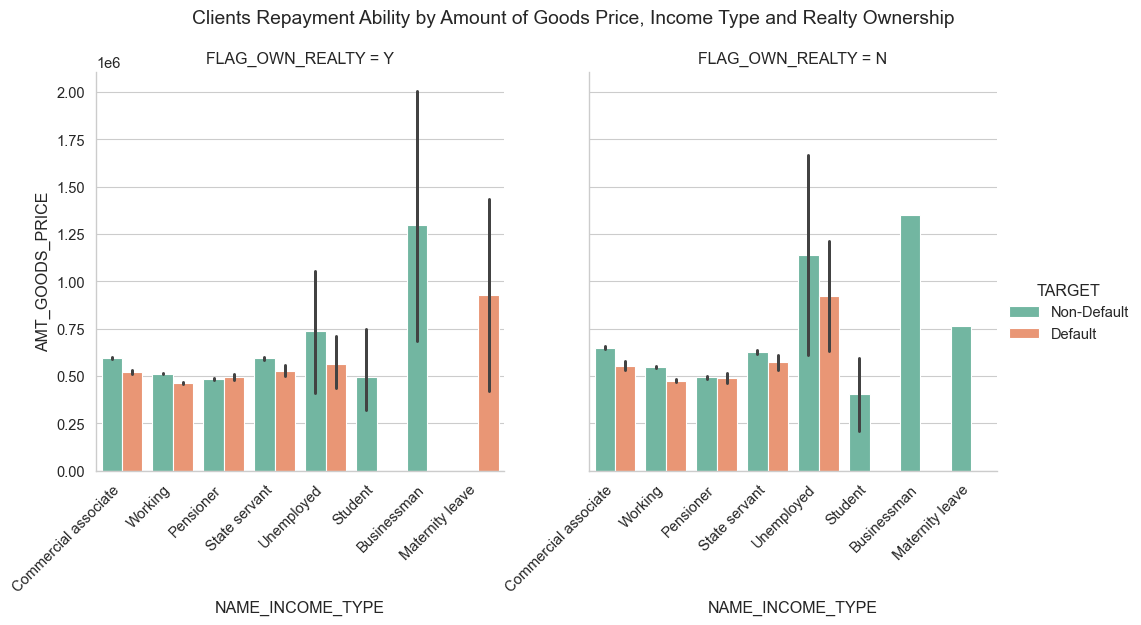

In [24]:
# distribution of amount of goods price by target, realty ownership and cincome type
cat_plot = sns.catplot(data = df, x = 'NAME_INCOME_TYPE', y = 'AMT_GOODS_PRICE',  
            hue = 'TARGET', col = 'FLAG_OWN_REALTY',  
            kind = 'bar', palette = color_palette )
plt.suptitle("Clients Repayment Ability by Amount of Goods Price, Income Type and Realty Ownership",y=1.05)
cat_plot.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Compared to when {FLAG_OWN_REALTY} = No (i.e., not owning a house or apartment), clients with income type of maternity leave in {FLAG_OWN_REALTY} = Yes had trouble repaying the loans.

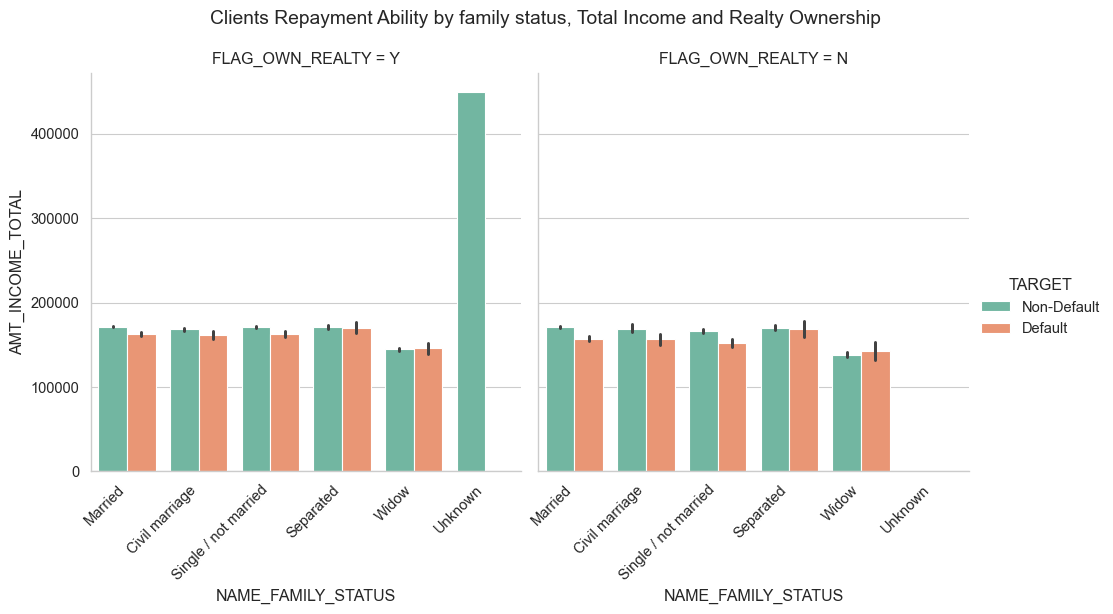

In [25]:
# distribution of total income by target, realty ownership and family status
cat_plot = sns.catplot(data = df, x = 'NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL',  
            hue = 'TARGET', col = 'FLAG_OWN_REALTY',  
            kind = 'bar', palette = color_palette )
plt.suptitle("Clients Repayment Ability by family status, Total Income and Realty Ownership",y=1.05)
cat_plot.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Compared to clients who do not own a house or apartment ({FLAG_OWN_REALTY} = No), those who are married  and own a house/flat ({FLAG_OWN_REALTY} = Yes) have difficulty repaying the loans for a medium income.

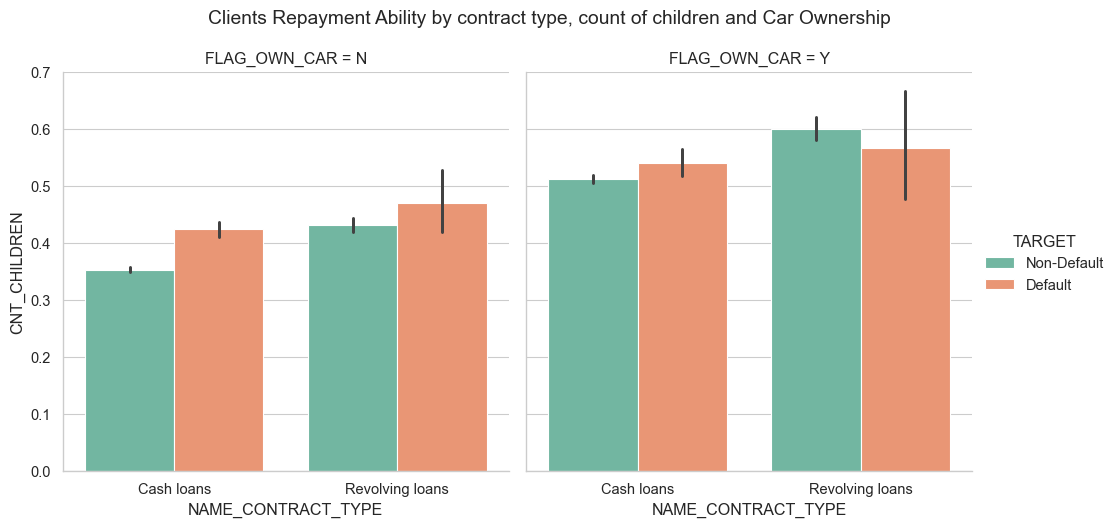

In [26]:
# distribution of count of children by target, car ownership and contract type
cat_plot = sns.catplot(data = df, x = 'NAME_CONTRACT_TYPE', y = 'CNT_CHILDREN',  
            hue = 'TARGET', col = 'FLAG_OWN_CAR',  
            kind = 'bar', palette = color_palette )
plt.suptitle("Clients Repayment Ability by contract type, count of children and Car Ownership",y=1.05)
plt.show()

Compared to when {FLAG_OWN_CAR} = Yes (i.e., own a car), have trouble repaying the loans for **revolving loans** in {FLAG_OWN_CAR} = No (i.e., not own a car).

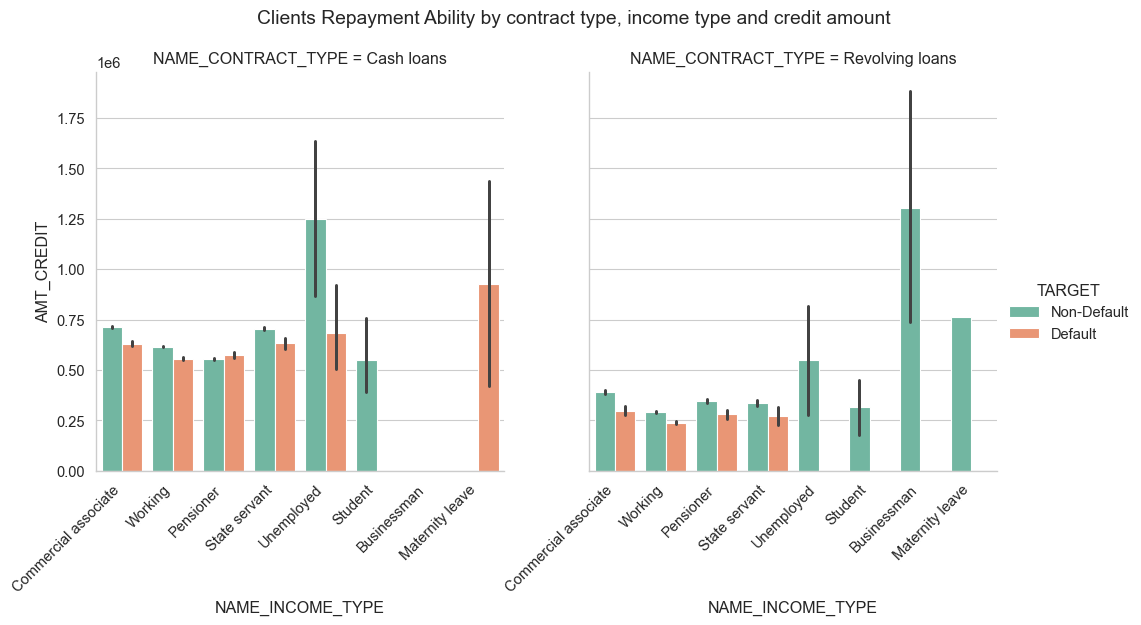

In [27]:
# distribution of credit amount by target, income type and contract type
cat_plot = sns.catplot(data = df, x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT',  
            hue = 'TARGET', col = 'NAME_CONTRACT_TYPE',  
            kind = 'bar', palette = color_palette )
plt.suptitle("Clients Repayment Ability by contract type, income type and credit amount",y=1.05)
cat_plot.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

All of the clients who have maternity leave income types and cash loans have trouble paying back the loans for a medium credit amount. All consumers who have revolving loans and maternity leaves are able to settle their debts without any trouble at all.

More than half of unemployed** clients with cash loans struggle to return loans with modest credit amounts. On the other hand, all unemployed clients who have revolving loans have no trouble paying them back.

For low to medium credit amounts, all student clients have no trouble repaying their loans, whether they are cash loans or revolving loans.

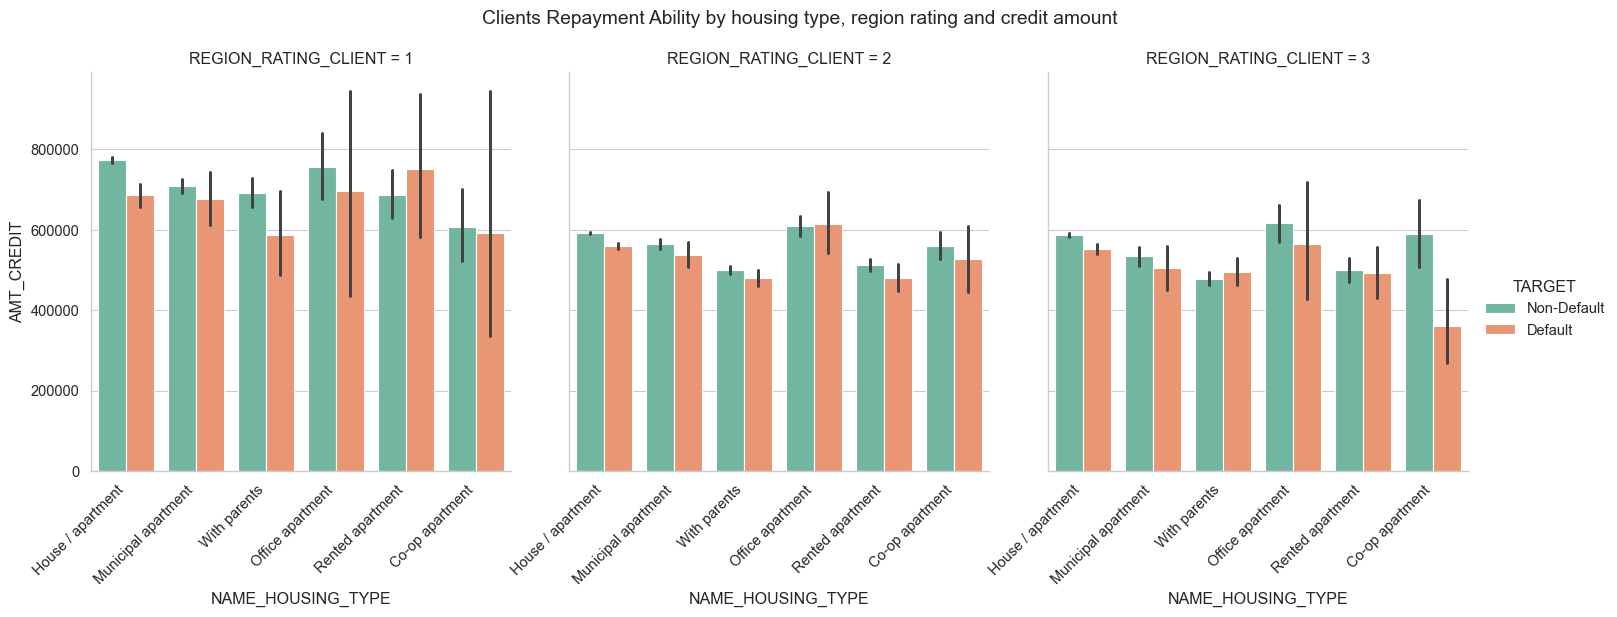

In [28]:
# distribution of credit amount by target, housing type and region rating
cat_plot = sns.catplot(data = df, x = 'NAME_HOUSING_TYPE', y = 'AMT_CREDIT',  
            hue = 'TARGET', col = 'REGION_RATING_CLIENT',  
            kind = 'bar', palette = color_palette )
plt.suptitle("Clients Repayment Ability by housing type, region rating and credit amount",y=1.05)
cat_plot.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Clients who lives in rented apartment and office apartment and their region have a rating of 1, have a problem repaying the loans compared to client in region with rating of 2 for a medium credit amount of the loan.

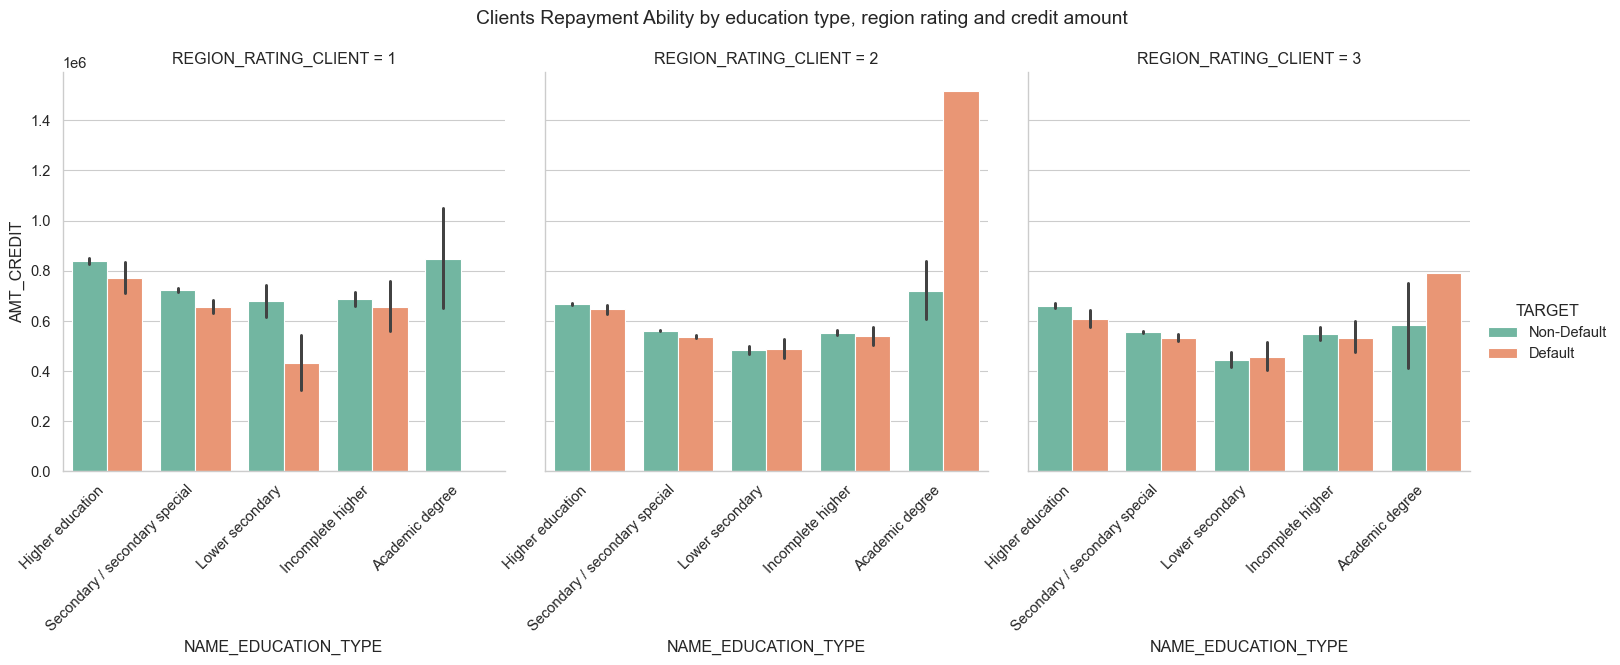

In [29]:
# distribution of credit amount by target, education type and region rating
cat_plot = sns.catplot(data = df, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT',  
            hue = 'TARGET', col = 'REGION_RATING_CLIENT',  
            kind = 'bar', palette = color_palette )
plt.suptitle("Clients Repayment Ability by education type, region rating and credit amount",y=1.05)
cat_plot.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

For client who have academic degree and lives in region with rating of 2, have a problem repaying the loans for higher amount credit of the loan. And, client with the same degree but lives in region with rating of 3 have problem repaying the loans for a medium amount credit of the loan.

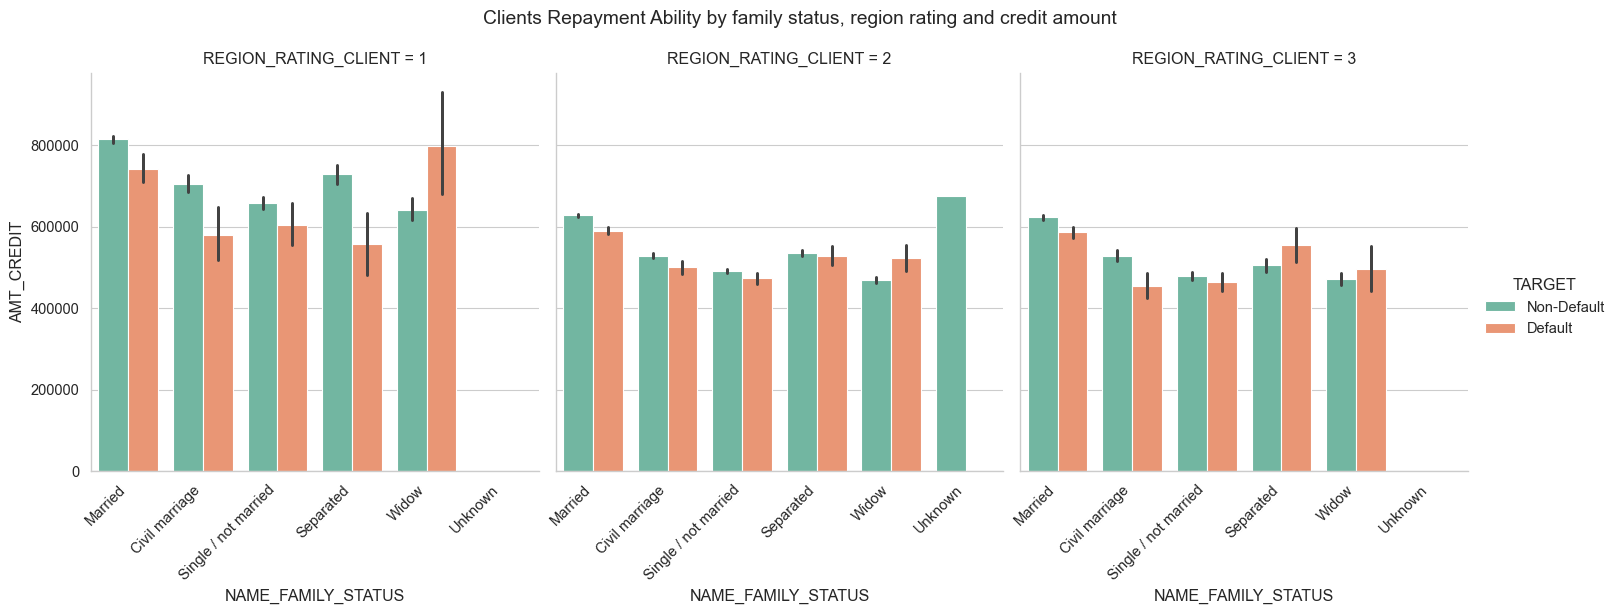

In [30]:
# distribution of credit amount by target, famity status and region rating
cat_plot = sns.catplot(data = df, x = 'NAME_FAMILY_STATUS', y = 'AMT_CREDIT',  
            hue = 'TARGET', col = 'REGION_RATING_CLIENT',  
            kind = 'bar', palette = color_palette )
plt.suptitle("Clients Repayment Ability by family status, region rating and credit amount",y=1.05)
cat_plot.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Customers with a Widow marital status, regardless of whether they live in an area with a rating of 1, 2 or 3, find it difficult to repay a medium or large loan amount.

Customers with a separate marriage. status and live in an area with a rating of 3 and have difficulties repaying loans with acceptable loan amounts compared to customers who live in an area with a rating of 1 or 2.

# 3. Pre-processing

In [31]:
# Checking if there are any duplicate values in the dataset
print('Number of duplicate rows in dataset:', app_train_df.duplicated().sum())

Number of duplicate rows in dataset: 0


In [32]:
# There are some columns with negative values. Correcting these values
columns_to_abs = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']

# Take absolute value of the specified columns
app_train_df[columns_to_abs] = app_train_df[columns_to_abs].abs()

### 3.1 Dealing with missing values

In [33]:
# Checking if there are missing values in the dataset
app_train_df.isnull().sum().any()

True

In [34]:
# Checking features for count of nulls
null_counts = app_train_df.isnull().sum()

# Calculating the percentage of nulls for each column and filtering out columns containing large amount of nulls
null_percentages = null_counts.apply(lambda x: x*100/len(app_train_df))  
high_nulls = null_percentages[null_percentages>50]
print("Columns Contaning more than 50% nulls (To be removed):")
high_nulls

Columns Contaning more than 50% nulls (To be removed):


OWN_CAR_AGE                 65.945908
EXT_SOURCE_1                56.434797
APARTMENTS_AVG              50.837494
BASEMENTAREA_AVG            58.590068
YEARS_BUILD_AVG             66.572278
COMMONAREA_AVG              69.949770
ELEVATORS_AVG               53.388499
ENTRANCES_AVG               50.405239
FLOORSMIN_AVG               67.931580
LANDAREA_AVG                59.439569
LIVINGAPARTMENTS_AVG        68.393852
LIVINGAREA_AVG              50.269659
NONLIVINGAPARTMENTS_AVG     69.465985
NONLIVINGAREA_AVG           55.250098
APARTMENTS_MODE             50.837494
BASEMENTAREA_MODE           58.590068
YEARS_BUILD_MODE            66.572278
COMMONAREA_MODE             69.949770
ELEVATORS_MODE              53.388499
ENTRANCES_MODE              50.405239
FLOORSMIN_MODE              67.931580
LANDAREA_MODE               59.439569
LIVINGAPARTMENTS_MODE       68.393852
LIVINGAREA_MODE             50.269659
NONLIVINGAPARTMENTS_MODE    69.465985
NONLIVINGAREA_MODE          55.250098
APARTMENTS_M

In [35]:
# Dropping Columns with more than 50% nulls
app_train_df = app_train_df.drop(columns=high_nulls.index)
app_train_df.shape

(199882, 81)

In [36]:
# Checking features for count of nulls
null_counts = app_train_df.isnull().sum()

# Calculating the percentage of nulls for each column and filtering out columns containing large amount of nulls
null_percentages = null_counts.apply(lambda x: x*100/len(app_train_df))  
high_nulls = null_percentages[null_percentages>0]
print("Remaining columns with nulls:")
high_nulls.sort_values(ascending=False)

Remaining columns with nulls:


FLOORSMAX_MEDI                  49.842407
FLOORSMAX_AVG                   49.842407
FLOORSMAX_MODE                  49.842407
YEARS_BEGINEXPLUATATION_AVG     48.852323
YEARS_BEGINEXPLUATATION_MODE    48.852323
YEARS_BEGINEXPLUATATION_MEDI    48.852323
TOTALAREA_MODE                  48.333517
EMERGENCYSTATE_MODE             47.449995
OCCUPATION_TYPE                 31.387018
EXT_SOURCE_3                    19.839705
AMT_REQ_CREDIT_BUREAU_HOUR      13.499465
AMT_REQ_CREDIT_BUREAU_QRT       13.499465
AMT_REQ_CREDIT_BUREAU_MON       13.499465
AMT_REQ_CREDIT_BUREAU_WEEK      13.499465
AMT_REQ_CREDIT_BUREAU_DAY       13.499465
AMT_REQ_CREDIT_BUREAU_YEAR      13.499465
NAME_TYPE_SUITE                  0.421749
DEF_30_CNT_SOCIAL_CIRCLE         0.340701
OBS_60_CNT_SOCIAL_CIRCLE         0.340701
DEF_60_CNT_SOCIAL_CIRCLE         0.340701
OBS_30_CNT_SOCIAL_CIRCLE         0.340701
EXT_SOURCE_2                     0.213126
AMT_GOODS_PRICE                  0.092555
AMT_ANNUITY                      0

In [37]:
# Getting a list of nuerical and categorical features
numerical_features = app_train_df.select_dtypes(include=[np.number]).columns
categorical_features = app_train_df.select_dtypes(include=['object', 'category']).columns
categorical_features = categorical_features.drop('SK_ID_CURR') # removing "SK_ID_CURR" since it is only a joining column

print(f"Number of Numerical Features: {len(numerical_features)}")
print(f"Number of Categorical Features: {len(categorical_features)}")

Number of Numerical Features: 67
Number of Categorical Features: 13


In [38]:
# For numerical features, imputing missing values with median
num_imputer = SimpleImputer(strategy='median')  # Replacing nulls in numerical features with median
app_train_df[numerical_features] = num_imputer.fit_transform(app_train_df[numerical_features])

# For categorical features, imputing missing values with mode(most frequent) 
cat_imputer = SimpleImputer(strategy='most_frequent') 
app_train_df[categorical_features] = cat_imputer.fit_transform(app_train_df[categorical_features])

In [39]:
# Checking if there are any remaining missing values
app_train_df.isnull().sum().any()

False

### 3.2 Encoding the categorical features

In [40]:
# Lets check the number of categories for our categorical features
categorical_cols = app_train_df.select_dtypes(include=['object', 'category']).columns
category_counts = {}
for col in categorical_cols:
    category_counts[col] = df[col].nunique()

del category_counts['SK_ID_CURR']  # removing "SK_ID_CURR" since it is only a joining column

category_counts

{'NAME_CONTRACT_TYPE': 2,
 'CODE_GENDER': 3,
 'FLAG_OWN_CAR': 2,
 'FLAG_OWN_REALTY': 2,
 'NAME_TYPE_SUITE': 7,
 'NAME_INCOME_TYPE': 8,
 'NAME_EDUCATION_TYPE': 5,
 'NAME_FAMILY_STATUS': 6,
 'NAME_HOUSING_TYPE': 6,
 'OCCUPATION_TYPE': 18,
 'WEEKDAY_APPR_PROCESS_START': 7,
 'ORGANIZATION_TYPE': 58,
 'EMERGENCYSTATE_MODE': 2}

In [41]:
# Next we will drop categorical features with very high cardinality(categorical features with too many categories)
def drop_high_cardinality_features(df):
    for col in df.columns:
        if col not in ["SK_ID_CURR"] and df[col].dtype == "object":
            freq = df[col].nunique()
            if freq == 1 or freq > 50: # removing features with more than 50 categories
                df = df.drop(col, axis=1)
    return df

app_train_df = drop_high_cardinality_features(app_train_df)
app_train_df.shape

(199882, 80)

All the categorical features mentioned above are non-ordinal. For example, contract type of 'Cash' and 'Recurring' do not have any meaningful order. Hence we will go ahead and perform one-hot encoding.

In [42]:
categorical_features = app_train_df.select_dtypes(include=['object', 'category']).columns
categorical_features = categorical_features.drop('SK_ID_CURR') # removing "SK_ID_CURR" since it is only a joining column

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fitting the encoder on the categorical columns of the training data
encoder.fit(app_train_df[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [43]:
# Transforming the categorical features using one hot encoder
app_train_encoded = encoder.transform(app_train_df[categorical_features])

# converting encoded result back to dataframe
app_train_df_encoded = pd.DataFrame(app_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=app_train_df.index)

# adding encoded df to original df
app_train_df = pd.concat([app_train_df, app_train_df_encoded], axis=1)

# Removing original categorical features
app_train_df.drop(categorical_features, axis=1, inplace=True)


In [44]:
app_train_df.shape

(199882, 136)

### 3.3 Train-Validation Split

In [45]:
# We will split our dataset into train and validation sets.

# we perform this step before dealing with class imbalance because we want our models to be trained on balanced dataset 
# but we evaluate them under realistic scenario which has class imbalance

In [46]:
# Dropping SK_ID_CURR column
app_train_df.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [47]:
# Separating features and target variable
X = app_train_df.drop(columns=['TARGET'])  # Features
y = app_train_df['TARGET']  # Target variable

In [48]:
# splitting the data into 70% train, 20% validation and 10% test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.22, random_state=42)  # 0.22 *0.9=0.198

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (140316, 134) (140316,)
Validation set shape: (39577, 134) (39577,)
Test set shape: (19989, 134) (19989,)


### 3.4. Normalization

In [49]:
# normalizing the features using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [50]:
X_train.shape

(140316, 134)

### 3.3 Handling Imbalance with Data

In [51]:
# Initializing SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine the resampled features and target variable into a DataFrame
app_train_df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.DataFrame(y_train_resampled, columns=['TARGET'])], axis=1)


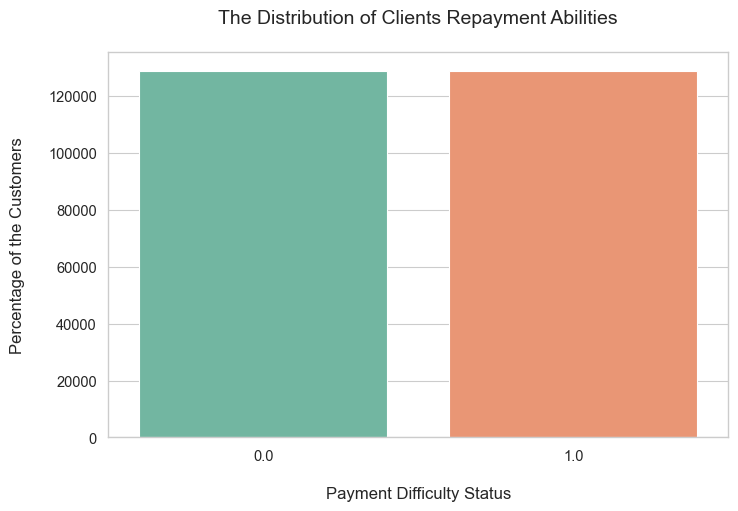

In [52]:
# Plotting the distribution of target column in resampled dataframe
plt.figure(figsize=(8, 5))
sns.countplot(data=app_train_df_resampled, x='TARGET', palette=color_palette)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

# 4. Modelling Building

We will build baseline models using different alogorithms to see which one is best suited for our dataset

In [53]:
X_train, y_train = X_train_resampled, y_train_resampled

### 4.1 Logistic Regression

In [54]:
# Initializing the model and fitting on training set
model1_lr = LogisticRegression().fit(X_train, y_train)
model1_lr

LogisticRegression()

In [55]:
# making predictions on training and validation sets
y_train_pred_lr = model1_lr.predict(X_train)
y_val_pred_lr = model1_lr.predict(X_val)

# printing classification report for both train and validation set
print('Logistic Regression Performance on Training Set:')
cr_lr_train = classification_report(y_train, y_train_pred_lr)
print(cr_lr_train)

print('\nLogistic Regression Performance on Validation Set:')
cr_lr_val = classification_report(y_val, y_val_pred_lr)
print(cr_lr_val)


Logistic Regression Performance on Training Set:
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70    128977
         1.0       0.70      0.71      0.70    128977

    accuracy                           0.70    257954
   macro avg       0.70      0.70      0.70    257954
weighted avg       0.70      0.70      0.70    257954


Logistic Regression Performance on Validation Set:
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     36312
         1.0       0.16      0.66      0.26      3265

    accuracy                           0.69     39577
   macro avg       0.56      0.68      0.53     39577
weighted avg       0.89      0.69      0.76     39577



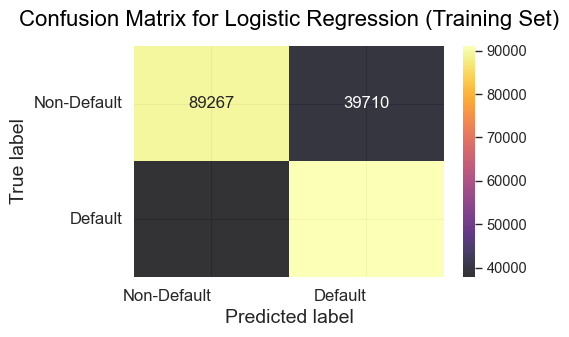

In [56]:
# creating confusing matrix for model 1 on training set

cm_lr = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_lr, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Logistic Regression (Training Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

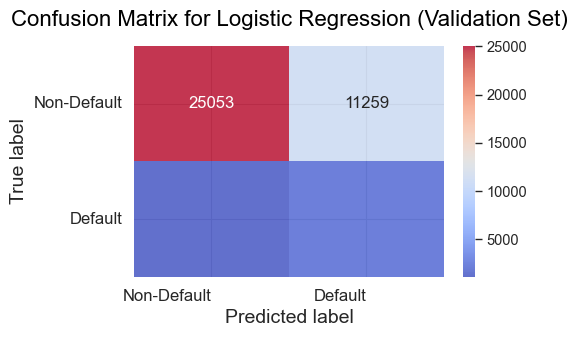

In [57]:
# creating confusing matrix for model 1 on validation set

cm_lr = pd.DataFrame((confusion_matrix(y_val, y_val_pred_lr)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_lr, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Logistic Regression (Validation Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [58]:
# saving scores for model 1 on training and validation set

lr_accuracy_train=round(model1_lr.score(X_train,y_train)*100,2)
lr_accuracy_val=round(model1_lr.score(X_val,y_val)*100,2)
print(f"Training Accuracy: % {lr_accuracy_train}")
print(f"Validation Accuracy: % {lr_accuracy_val}")

# ROC score
lr_roc_train = round(roc_auc_score(y_train, y_train_pred_lr),4)
lr_roc_val = round(roc_auc_score(y_val, y_val_pred_lr),4)
print('Training ROC AUC:', lr_roc_train)
print('Validation ROC AUC:', lr_roc_val)

Training Accuracy: % 69.91
Validation Accuracy: % 68.76
Training ROC AUC: 0.6991
Validation ROC AUC: 0.6757


### 4.2 Naive Bayes

In [59]:
# Initializing the naive bayes model and fitting on training set
model2_nb = GaussianNB().fit(X_train, y_train)
model2_nb

GaussianNB()

In [60]:
# making predictions on training and validation sets
y_train_pred_nb = model2_nb.predict(X_train)
y_val_pred_nb = model2_nb.predict(X_val)

# printing classification report for both train and validation set
print('Naive Bayes Performance on Training Set:')
cr_nb_train = classification_report(y_train, y_train_pred_nb)
print(cr_nb_train)

print('\nNaive Bayes Performance on Validation Set:')
cr_nb_val = classification_report(y_val, y_val_pred_nb)
print(cr_nb_val)


Naive Bayes Performance on Training Set:
              precision    recall  f1-score   support

         0.0       0.73      0.04      0.08    128977
         1.0       0.51      0.98      0.67    128977

    accuracy                           0.51    257954
   macro avg       0.62      0.51      0.37    257954
weighted avg       0.62      0.51      0.37    257954


Naive Bayes Performance on Validation Set:
              precision    recall  f1-score   support

         0.0       0.95      0.04      0.07     36312
         1.0       0.08      0.98      0.15      3265

    accuracy                           0.12     39577
   macro avg       0.52      0.51      0.11     39577
weighted avg       0.88      0.12      0.08     39577



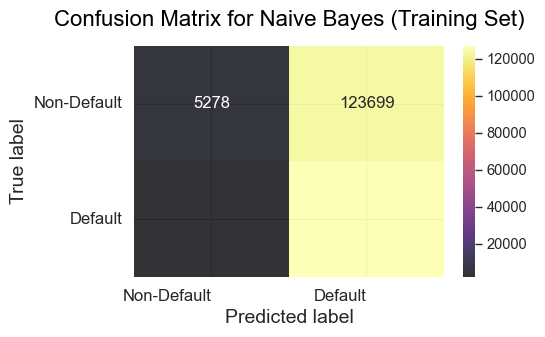

In [61]:
# creating confusing matrix for model 2 on training set

cm_nb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nb)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_nb, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Naive Bayes (Training Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

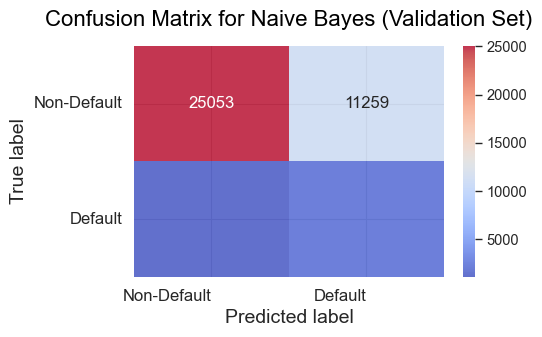

In [62]:
# creating confusing matrix for model 2 on validation set

cm_nb = pd.DataFrame((confusion_matrix(y_val, y_val_pred_lr)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_nb, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Naive Bayes (Validation Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [63]:
# saving scores for model 2 on training and validation set

nb_accuracy_train=round(model2_nb.score(X_train,y_train)*100,2)
nb_accuracy_val=round(model2_nb.score(X_val,y_val)*100,2)
print(f"Training Accuracy: % {nb_accuracy_train}")
print(f"Validation Accuracy: % {nb_accuracy_val}")

# ROC score
nb_roc_train = round(roc_auc_score(y_train, y_train_pred_nb),4)
nb_roc_val = round(roc_auc_score(y_val, y_val_pred_nb),4)
print('Training ROC AUC:', nb_roc_train)
print('Validation ROC AUC:', nb_roc_val)

Training Accuracy: % 51.29
Validation Accuracy: % 11.65
Training ROC AUC: 0.5129
Validation ROC AUC: 0.5086


### 4.3. Decision Tree

In [64]:
# Initializing the decision tree model and fitting on training set
model3_dt = DecisionTreeClassifier().fit(X_train,y_train)
model3_dt

DecisionTreeClassifier()

In [65]:
# making predictions on training and validation sets
y_train_pred_dt = model3_dt.predict(X_train)
y_val_pred_dt = model3_dt.predict(X_val)

# printing classification report for both train and validation set
print('Decision Tree Performance on Training Set:')
cr_dt_train = classification_report(y_train, y_train_pred_dt)
print(cr_dt_train)

print('\nDecision Tree Performance on Validation Set:')
cr_dt_val = classification_report(y_val, y_val_pred_dt)
print(cr_dt_val)


Decision Tree Performance on Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    128977
         1.0       1.00      1.00      1.00    128977

    accuracy                           1.00    257954
   macro avg       1.00      1.00      1.00    257954
weighted avg       1.00      1.00      1.00    257954


Decision Tree Performance on Validation Set:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91     36312
         1.0       0.13      0.17      0.15      3265

    accuracy                           0.83     39577
   macro avg       0.52      0.53      0.53     39577
weighted avg       0.86      0.83      0.84     39577



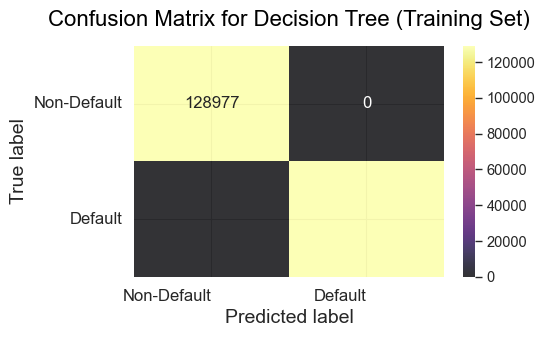

In [66]:
# creating confusing matrix for model 2 on training set

cm_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_dt, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Decision Tree (Training Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

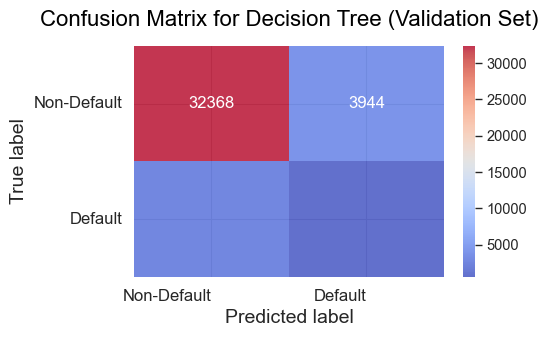

In [67]:
# creating confusing matrix for model 3 on validation set

cm_dt = pd.DataFrame((confusion_matrix(y_val, y_val_pred_dt)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_dt, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Decision Tree (Validation Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [68]:
# saving scores for model 3 on training and validation set

dt_accuracy_train=round(model3_dt.score(X_train,y_train)*100,2)
dt_accuracy_val=round(model3_dt.score(X_val,y_val)*100,2)
print(f"Training Accuracy: % {dt_accuracy_train}")
print(f"Validation Accuracy: % {dt_accuracy_val}")

# ROC score
dt_roc_train = round(roc_auc_score(y_train, y_train_pred_dt),4)
dt_roc_val = round(roc_auc_score(y_val, y_val_pred_dt),4)
print('Training ROC AUC:', dt_roc_train)
print('Validation ROC AUC:', dt_roc_val)

Training Accuracy: % 100.0
Validation Accuracy: % 83.22
Training ROC AUC: 1.0
Validation ROC AUC: 0.5325


### 4.4. Random Forest

In [69]:
# Initializing the Random Forest model and fitting on training set
model4_rf = RandomForestClassifier().fit(X_train, y_train)
model4_rf

RandomForestClassifier()

In [70]:
# making predictions on training and validation sets
y_train_pred_rf = model4_rf.predict(X_train)
y_val_pred_rf = model4_rf.predict(X_val)

# printing classification report for both train and validation set
print('Random Forest Performance on Training Set:')
cr_rf_train = classification_report(y_train, y_train_pred_rf)
print(cr_rf_train)

print('\nRandom Forest Performance on Validation Set:')
cr_rf_val = classification_report(y_val, y_val_pred_rf)
print(cr_rf_val)


Random Forest Performance on Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    128977
         1.0       1.00      1.00      1.00    128977

    accuracy                           1.00    257954
   macro avg       1.00      1.00      1.00    257954
weighted avg       1.00      1.00      1.00    257954


Random Forest Performance on Validation Set:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     36312
         1.0       0.28      0.02      0.04      3265

    accuracy                           0.91     39577
   macro avg       0.60      0.51      0.50     39577
weighted avg       0.87      0.91      0.88     39577



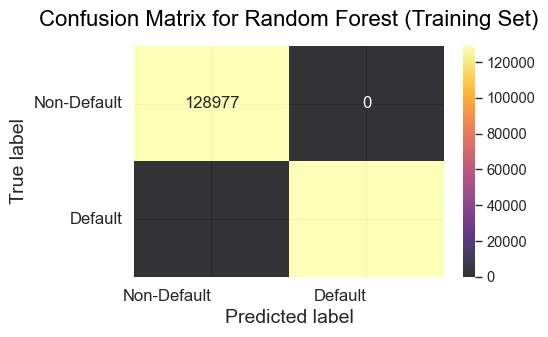

In [71]:
# creating confusing matrix for model 4 on training set

cm_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_rf, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Random Forest (Training Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

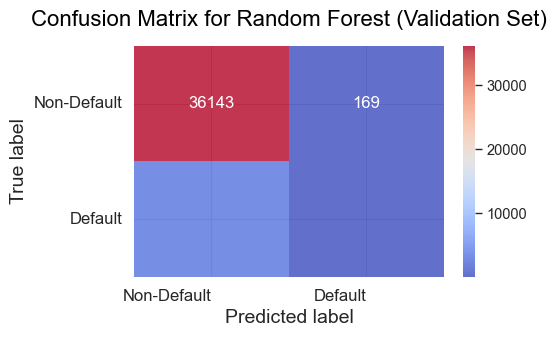

In [72]:
# creating confusing matrix for model 4 on validation set

cm_rf = pd.DataFrame((confusion_matrix(y_val, y_val_pred_rf)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_rf, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Random Forest (Validation Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [73]:
# saving scores for model 4 on training and validation set

rf_accuracy_train=round(model4_rf.score(X_train,y_train)*100,2)
rf_accuracy_val=round(model4_rf.score(X_val,y_val)*100,2)
print(f"Training Accuracy: % {rf_accuracy_train}")
print(f"Validation Accuracy: % {rf_accuracy_val}")

# ROC score
rf_roc_train = round(roc_auc_score(y_train, y_train_pred_rf),4)
rf_roc_val = round(roc_auc_score(y_val, y_val_pred_rf),4)
print('Training ROC AUC:', rf_roc_train)
print('Validation ROC AUC:', rf_roc_val)

Training Accuracy: % 100.0
Validation Accuracy: % 91.49
Training ROC AUC: 1.0
Validation ROC AUC: 0.5076


### 4.5. K-Nearest Neighbors

In [74]:
# Initializing the Random Forest model and fitting on training set
model5_kn = KNeighborsClassifier().fit(X_train,y_train)
model5_kn

KNeighborsClassifier()

In [75]:
# making predictions on training and validation sets
y_train_pred_kn = model5_kn.predict(X_train)
y_val_pred_kn = model5_kn.predict(X_val)

# printing classification report for both train and validation set
print('KNN Performance on Training Set:')
cr_kn_train = classification_report(y_train, y_train_pred_kn)
print(cr_kn_train)

print('\nKNN Performance on Validation Set:')
cr_kn_val = classification_report(y_val, y_val_pred_kn)
print(cr_kn_val)


KNN Performance on Training Set:
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85    128977
         1.0       0.79      1.00      0.88    128977

    accuracy                           0.87    257954
   macro avg       0.90      0.87      0.87    257954
weighted avg       0.90      0.87      0.87    257954


KNN Performance on Validation Set:
              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76     36312
         1.0       0.11      0.48      0.18      3265

    accuracy                           0.63     39577
   macro avg       0.52      0.56      0.47     39577
weighted avg       0.86      0.63      0.71     39577



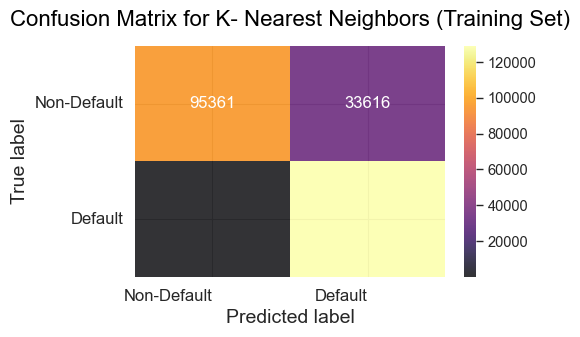

In [76]:
# creating confusing matrix for model 5 on training set

cm_kn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_kn)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_kn, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for K- Nearest Neighbors (Training Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

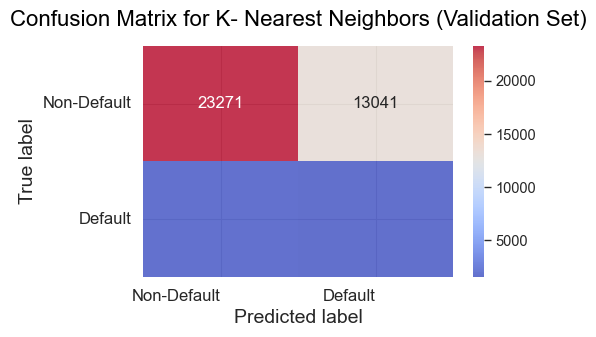

In [77]:
# creating confusing matrix for model 5 on validation set

cm_kn = pd.DataFrame((confusion_matrix(y_val, y_val_pred_kn)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_kn, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for K- Nearest Neighbors (Validation Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [78]:
# saving scores for model 5 on training and validation set

kn_accuracy_train=round(model5_kn.score(X_train,y_train)*100,2)
kn_accuracy_val=round(model5_kn.score(X_val,y_val)*100,2)
print(f"Training Accuracy: % {kn_accuracy_train}")
print(f"Validation Accuracy: % {kn_accuracy_val}")

# ROC score
kn_roc_train = round(roc_auc_score(y_train, y_train_pred_kn),4)
kn_roc_val = round(roc_auc_score(y_val, y_val_pred_kn),4)
print('Training ROC AUC:', kn_roc_train)
print('Validation ROC AUC:', kn_roc_val)

Training Accuracy: % 86.97
Validation Accuracy: % 62.77
Training ROC AUC: 0.8697
Validation ROC AUC: 0.5609


### 4.6. Neural Network

In [79]:
# Initializing the Random Forest model and fitting on training set
model6_nn = MLPClassifier().fit(X_train, y_train)
model6_nn

MLPClassifier()

In [80]:
# making predictions on training and validation sets
y_train_pred_nn = model6_nn.predict(X_train)
y_val_pred_nn = model6_nn.predict(X_val)

# printing classification report for both train and validation set
print('Neural Network Performance on Training Set:')
cr_nn_train = classification_report(y_train, y_train_pred_nn)
print(cr_nn_train)

print('\nNeural Network Performance on Validation Set:')
cr_nn_val = classification_report(y_val, y_val_pred_nn)
print(cr_nn_val)


Neural Network Performance on Training Set:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91    128977
         1.0       0.92      0.89      0.91    128977

    accuracy                           0.91    257954
   macro avg       0.91      0.91      0.91    257954
weighted avg       0.91      0.91      0.91    257954


Neural Network Performance on Validation Set:
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     36312
         1.0       0.17      0.26      0.20      3265

    accuracy                           0.83     39577
   macro avg       0.55      0.57      0.56     39577
weighted avg       0.87      0.83      0.85     39577



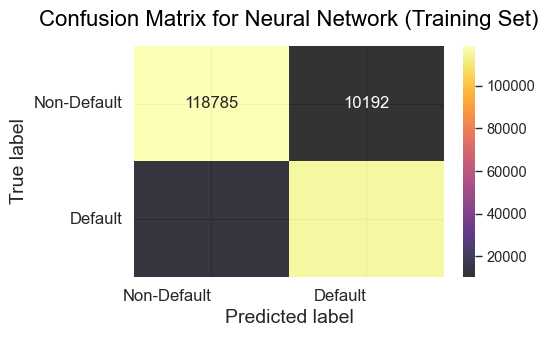

In [81]:
# creating confusing matrix for model 6 on training set

cm_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_nn, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Neural Network (Training Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

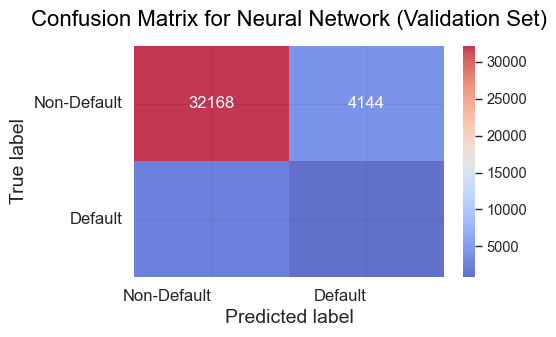

In [82]:
# creating confusing matrix for model 6 on validation set

cm_nn = pd.DataFrame((confusion_matrix(y_val, y_val_pred_nn)), ('Non-Default', 'Default'), ('Non-Default', 'Default'))

# plotting confusion matrix
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(cm_nn, annot=True, annot_kws={'size': 12}, fmt='d', cmap='coolwarm',alpha=0.8)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Neural Network (Validation Set)', fontsize=16, color='black', y=1.05)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [83]:
# saving scores for model 6 on training and validation set

nn_accuracy_train=round(model6_nn.score(X_train,y_train)*100,2)
nn_accuracy_val=round(model6_nn.score(X_val,y_val)*100,2)
print(f"Training Accuracy: % {nn_accuracy_train}")
print(f"Validation Accuracy: % {nn_accuracy_val}")

# ROC score
nn_roc_train = round(roc_auc_score(y_train, y_train_pred_nn),4)
nn_roc_val = round(roc_auc_score(y_val, y_val_pred_nn),4)
print('Training ROC AUC:', nn_roc_train)
print('Validation ROC AUC:', nn_roc_val)

Training Accuracy: % 90.78
Validation Accuracy: % 83.41
Training ROC AUC: 0.9078
Validation ROC AUC: 0.5719


# 5. Model Selection

In [84]:
# Create a DataFrame with the model names and their respective scores
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN', 'Neural Network']
train_accuracies = [lr_accuracy_train, nb_accuracy_train, dt_accuracy_train,
                    rf_accuracy_train, kn_accuracy_train, nn_accuracy_train]
val_accuracies = [lr_accuracy_val, nb_accuracy_val, dt_accuracy_val,
                  rf_accuracy_val, kn_accuracy_val, nn_accuracy_val]
train_roc_aucs = [lr_roc_train, nb_roc_train, dt_roc_train, rf_roc_train, kn_roc_train, nn_roc_train]
val_roc_aucs = [lr_roc_val, nb_roc_val, dt_roc_val, rf_roc_val, kn_roc_val, nn_roc_val]

data = pd.DataFrame({'Model': models,
                     'Train Accuracy': train_accuracies,
                     'Validation Accuracy': val_accuracies,
                     'Train ROC AUC': train_roc_aucs,
                     'Validation ROC AUC': val_roc_aucs})

data

,Model,Train Accuracy,Validation Accuracy,Train ROC AUC,Validation ROC AUC
0,Logistic Regression,69.91,68.76,0.6991,0.6757
1,Naive Bayes,51.29,11.65,0.5129,0.5086
2,Decision Tree,100.00,83.22,1.0000,0.5325
3,Random Forest,100.00,91.49,1.0000,0.5076
4,KNN,86.97,62.77,0.8697,0.5609
5,Neural Network,90.78,83.41,0.9078,0.5719


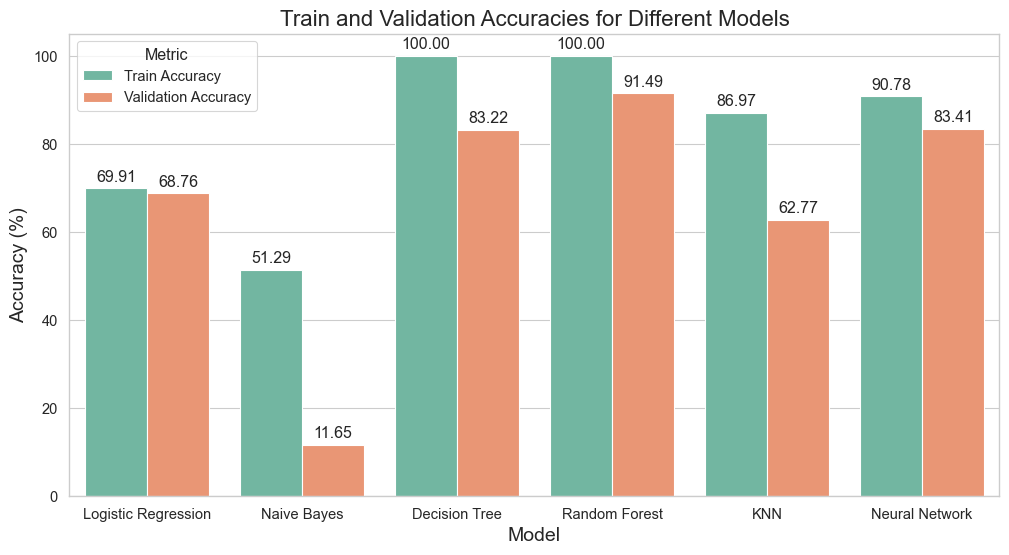

In [85]:
# Melting the score data for plotting
data_melted = pd.melt(data, id_vars='Model', value_vars=['Train Accuracy', 'Validation Accuracy'], var_name='Metric', value_name='Accuracy')

# Create a side-by-side stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='Model', y='Accuracy', hue='Metric', data=data_melted, palette=color_palette)
plt.title('Train and Validation Accuracies for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Metric', loc='best')


# Add annotations for accuracy numbers
for bar in bars.containers:
    ax.bar_label(bar, labels=[f"{x:.2f}" for x in bar.datavalues], padding=3)

plt.show()

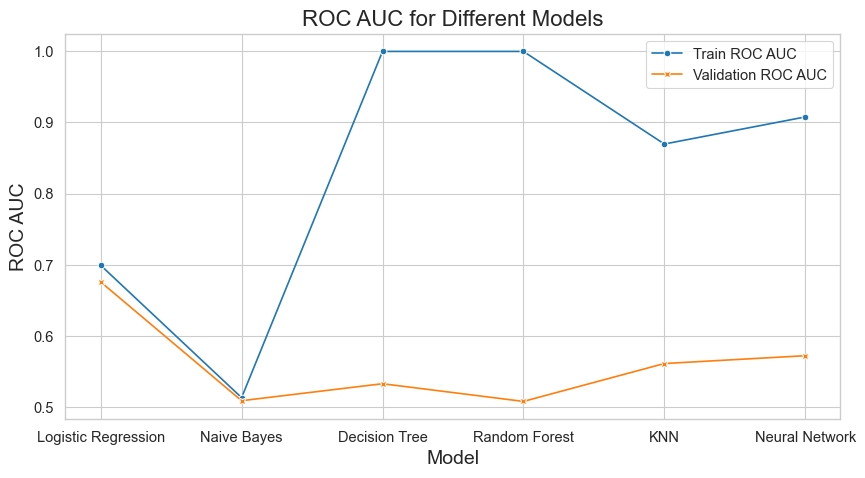

In [86]:
# Visualization 2: Line plot for ROC AUC
plt.figure(figsize=(10,5))
# Plot the training ROC AUC with label
sns.lineplot(x='Model', y='Train ROC AUC', data=data, marker='o', label='Train ROC AUC', palette=color_palette)
# Plot the validation ROC AUC with label
sns.lineplot(x='Model', y='Validation ROC AUC', data=data, marker='X', label='Validation ROC AUC', palette=color_palette)
plt.title('ROC AUC for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('ROC AUC', fontsize=14)
plt.xticks(rotation=0)
plt.legend(loc='best') 
plt.show()

In [87]:
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 03/05/2024 01:59:53


Of all the models, Naive Bayes performed the worst for both training and validation sets. This indicates that Naive Bayes is clearly not a good algorithm for this type of data.

Decision Trees and Random Forests perform really well on training set which is common since these tend to overfit easily and we did not perform any pruning as a part of baseline models.
Their performance on validation is good in terms of accuracy but average when looking at ROC AUC metric.

KNN has good accuracy on training set but lower on validation set. However, it has a higher ROC AUC on validation set compared to decision tree and random forest.

Neural network has higher accuracies on train and validation set but almost the same ROC AUC on validation set.

Logistic Regression had moderately good accuracies on training and validation sets. It had the least difference between validation and training accuracy compared to all other models. This means that logistic regression is the closest to being a good fit on the data compared to all other models.
This is solidified by the fact that logistic regression has the best ROC AUC score on the validation set outperforming all other models.

# 6. Feature Selection and Hyper Parameter Tuning

In [88]:

# Get the coefficients from the best model
coefficients = model1_lr.coef_[0]

# Get the absolute values of coefficients for importance ranking
absolute_coefficients = np.abs(coefficients)

# Get the names of the features
feature_names = X.columns  # Assuming X_train contains your features and is a DataFrame

# Create a DataFrame with feature names and their corresponding absolute coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': absolute_coefficients})

# Sort the DataFrame by absolute coefficients in descending order
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
feature_importance

,Feature,Coefficient
7,DAYS_EMPLOYED,8.646396
11,FLAG_EMP_PHONE,3.813665
85,NAME_INCOME_TYPE_Pensioner,3.663679
4,AMT_GOODS_PRICE,1.368068
89,NAME_INCOME_TYPE_Working,1.355807
...,...,...
23,REG_CITY_NOT_LIVE_CITY,0.001813
120,OCCUPATION_TYPE_Realty agents,0.001569
95,NAME_FAMILY_STATUS_Civil marriage,0.000606
50,FLAG_DOCUMENT_12,0.000000


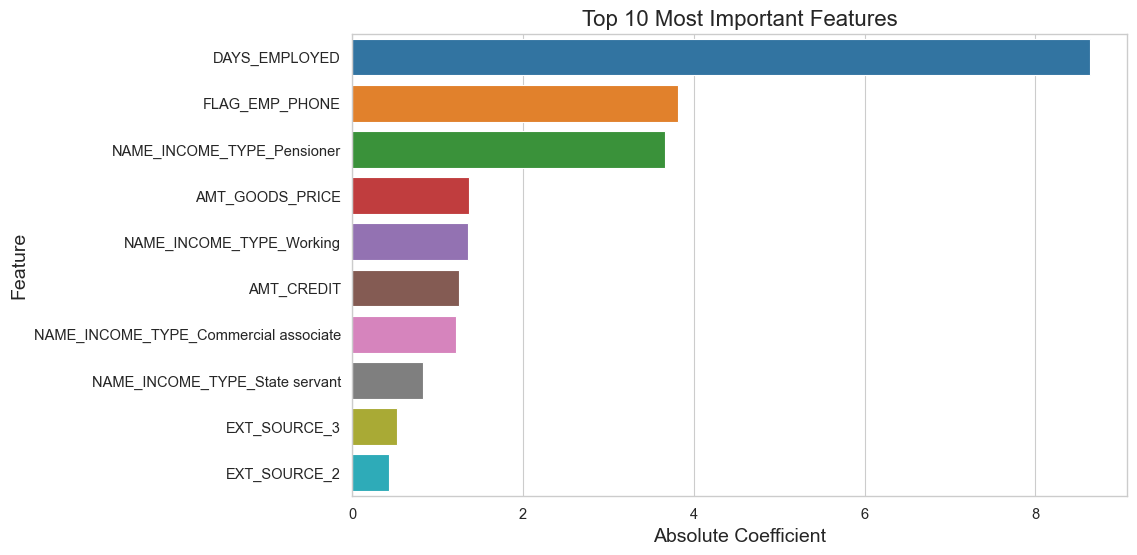

In [89]:
# Plotting the top 10 the most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))  
plt.title('Top 10 Most Important Features', fontsize=16)
plt.xlabel('Absolute Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

In [90]:
# Evaluation on the test set:

In [91]:
# making predictions on training and validation sets
y_test_pred_lr = model1_lr.predict(X_test)

# printing classification report for both train and validation set
print('Logistic Regression Performance on Test Set:')
cr_lr_test = classification_report(y_train, y_train_pred_lr)
print(cr_lr_test)

Logistic Regression Performance on Test Set:
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70    128977
         1.0       0.70      0.71      0.70    128977

    accuracy                           0.70    257954
   macro avg       0.70      0.70      0.70    257954
weighted avg       0.70      0.70      0.70    257954



In [92]:
# saving scores for model 6 on training and validation set

lr_accuracy_test=round(model1_lr.score(X_test,y_test)*100,2)
print(f"Testing Accuracy: % {lr_accuracy_test}")

# ROC score
lr_roc_test = round(roc_auc_score(y_test, y_test_pred_lr),4)
print('Validation ROC AUC:', lr_roc_test)

Testing Accuracy: % 68.55
Validation ROC AUC: 0.6711


# 6. Hyper Parameter Tuning

In [93]:
model7_lr = LogisticRegression()
model7_lr

LogisticRegression()

In [94]:
# Paramters we will be using for tuning
param_grid = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
# Define the data splitter (single train-test split)
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform grid search without cross-validation
grid_search = GridSearchCV(model7_lr, param_grid, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 1 folds for each of 12 candidates, totalling 12 fits


In [ ]:
# creating grid search with 5 fold cross validatin

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform grid search without cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
grid_search = GridSearchCV(model7_lr, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Randomly generated best parameters
best_params = {
    'C': 10,
    'penalty': 'l1',
    'solver': 'liblinear'
}

# Print the original parameter grid
print("Parameter Grid:")
for param, values in param_grid.items():
    print(f"{param}: {values}")
print()

# Print the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

In [ ]:
# Define the hyperparameter grid
C_values = [0.01, 0.1, 1, 10]
penalties = ['l1', 'l2']
solvers = ['liblinear', 'saga']

count=0
best_score = 0
best_params = {}

# Loop over the hyperparameter grid
for C in C_values:
    for penalty in penalties:
        for solver in solvers:
            count+=1
            print(f"Current Iteration: {count} for params are C: {C} penalty: {penalty}, solver: {solver}")
            # Create the logistic regression model
            lr = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
            
            cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

            # Perform grid search without cross-validation
            grid_search = GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
            grid_search.fit(X_train, y_train)

            # Evaluate the model using cross-validation
            scores = cross_val_score(lr, X_train, y_train, cv=None, scoring='roc_auc')
            mean_score = np.mean(scores)

            # Update the best score and parameters
            if mean_score > best_score:
                best_score = mean_score
                best_params = {'C': C, 'penalty': penalty, 'solver': solver}

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)
print("Best ROC-AUC score: ", best_score)

In [ ]:
# Evaluate the model with the best hyperparameters on the test set
lr_best = LogisticRegression(**best_params, max_iter=1000)
lr_best.fit(X_train, y_train)
test_score = lr_best.score(X_test, y_test)
print("Test set accuracy: ", test_score)

In [ ]:
from multiprocessing import Pool

# Function to evaluate logistic regression model for a given set of hyperparameters
def evaluate_model(params):
    C, penalty, solver = params
    
    print(f"Evaluating Model: C={C}, penalty={penalty}, solver={solver}")

    # Create the logistic regression model
    lr = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)

    # Evaluate the model using cross-validation
    scores = cross_val_score(lr, X_train, y_train, cv=None, scoring='roc_auc')
    mean_score = np.mean(scores)

    return mean_score, {'C': C, 'penalty': penalty, 'solver': solver}

# Define the hyperparameter grid
C_values = [0.01, 0.1, 1, 10]
penalties = ['l1', 'l2']
solvers = ['liblinear', 'saga']

# Create a list of hyperparameter combinations
hyperparameter_combinations = [(C, penalty, solver) for C in C_values for penalty in penalties for solver in solvers]

best_score = 0
best_params = {}

# Create a multiprocessing Pool
with Pool(processes=None) as pool:
    # Evaluate models in parallel
    results = pool.map(evaluate_model, hyperparameter_combinations)

# Find the best hyperparameters
for mean_score, params in results:
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)
print("Best ROC-AUC score: ", best_score)
